# Data cleanup

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('data/HW1-Data.csv')
df.head()

,Student ID,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
0,NaN,Max:50,Max:400,Max:140,NaN,Max:100
1,NaN,NaN,NaN,NaN,NaN,NaN
2,S1,41,244,136,50.0,90
3,S2,50,400,140,50.0,100
4,S3,43,327,88,50.0,79


In [3]:
# drop first 2 rows and start from index 0
df = df.drop(index=[0, 1])
df = df.reset_index(drop=True)
df.head()

,Student ID,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
0,S1,41,244,136,50.0,90
1,S2,50,400,140,50.0,100
2,S3,43,327,88,50.0,79
3,S4,43,336,123,50.0,35
4,S5,41,232,100,50.0,79


In [4]:
# drop Student ID since studentID = index + 1
df = df.drop(columns=['Student ID'])
df.head()

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
0,41,244,136,50.0,90
1,50,400,140,50.0,100
2,43,327,88,50.0,79
3,43,336,123,50.0,35
4,41,232,100,50.0,79


In [5]:
# convert all columns to float
for col in df.columns:
    df[col] = df[col].astype(float)

# Q1

## 1b. Get student reference ID

In [6]:
M_NUMBER_LAST_THREE_DIGITS = 830
STUDENT_REF_ID = (M_NUMBER_LAST_THREE_DIGITS % 26 ) + 4
print(f"Student Reference ID: {STUDENT_REF_ID}")

Student Reference ID: 28


## 1c. Standardize

In [43]:
# calculate mean and standard deviation
means = []
std_devs = []

for col in df.columns:
    mean = df[col].astype(float).mean()
    std_dev = df[col].astype(float).std()
    means.append(mean)
    std_devs.append(std_dev)

# print("(*) Means and standard deviation of each column:")
# for col, mean, std_dev in zip(df.columns, means, std_devs):
#     print(f"    {col}: {mean:2.2f} ± {std_dev:2.2f}")

# to dataframe
df_stats = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': std_devs
}, index=df.columns)
df_stats

,Mean,Standard Deviation
Test1,42.400000,6.360438
Homeworks,291.466667,81.549111
Quizzes,114.833333,20.938470
Presentation,48.666667,3.457459
Fianl-Exam,68.166667,22.891172


In [8]:
# normalize data
df_normalized_1 = df.copy()
for i, col in enumerate(df_normalized_1.columns):
    df_normalized_1[col] = (df_normalized_1[col] - means[i]) / std_devs[i]
df_normalized_1.head()

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
0,-0.220111,-0.582062,1.010898,0.38564,0.953788
1,1.194886,1.330895,1.201934,0.38564,1.390638
2,0.094333,0.435729,-1.281533,0.38564,0.473254
3,0.094333,0.546092,0.390032,0.38564,-1.448885
4,-0.220111,-0.729213,-0.708425,0.38564,0.473254


In [9]:
# another way to normalize data using means and std_devs
df_normalized_2 = df.copy()
for col in df_normalized_2.columns:
    df_normalized_2[col] = (df_normalized_2[col]- df_normalized_2[col].mean()) / df_normalized_2[col].std()
df_normalized_2.head()

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
0,-0.220111,-0.582062,1.010898,0.38564,0.953788
1,1.194886,1.330895,1.201934,0.38564,1.390638
2,0.094333,0.435729,-1.281533,0.38564,0.473254
3,0.094333,0.546092,0.390032,0.38564,-1.448885
4,-0.220111,-0.729213,-0.708425,0.38564,0.473254


## 1d. Reference student original and stardardize score

In [10]:
# print the row corresponding to your STUDENT_REF_ID
print(f'Student Reference ID: {STUDENT_REF_ID}, index: {STUDENT_REF_ID-1}\n')
print(f'Original DataFrame:\n{df.iloc[STUDENT_REF_ID-1]}\n')
print(f'Normalized DataFrame:\n{df_normalized_1.iloc[STUDENT_REF_ID-1]}')

Student Reference ID: 28, index: 27

Original DataFrame:
Test1            45.0
Homeworks       392.0
Quizzes         130.0
Presentation     50.0
Fianl-Exam       77.0
Name: 27, dtype: float64

Normalized DataFrame:
Test1           0.408777
Homeworks       1.232795
Quizzes         0.724345
Presentation    0.385640
Fianl-Exam      0.385884
Name: 27, dtype: float64


## 1e. Highest and lowest standardized scores

In [11]:
# get highest and lowest standardized score for each column in normalized DataFrame
print("\n(*) Highest and lowest standardized score for each column in normalized DataFrame:")
for col in df_normalized_1.columns:
    print(f"Column '{col}': highest = {df_normalized_1[col].max():.4f}, lowest = {df_normalized_1[col].min():.4f}")

# organize into a new DataFrame
df_summary = pd.DataFrame({
    'Column': df.columns,
    'Mean': means,
    'Standard Deviation': std_devs,
    'Highest Standardized Score': [df_normalized_1[col].max() for col in df.columns],
    'Lowest Standardized Score': [df_normalized_1[col].min() for col in df.columns]
})
df_summary = df_summary.set_index('Column')
print("\n(*) Summary DataFrame:")
df_summary


(*) Highest and lowest standardized score for each column in normalized DataFrame:
Column 'Test1': highest = 1.1949, lowest = -2.4212
Column 'Homeworks': highest = 1.3309, lowest = -2.0045
Column 'Quizzes': highest = 1.2019, lowest = -1.9502
Column 'Presentation': highest = 0.3856, lowest = -2.5067
Column 'Fianl-Exam': highest = 1.3906, lowest = -1.9294

(*) Summary DataFrame:


,Mean,Standard Deviation,Highest Standardized Score,Lowest Standardized Score
Column,,,,
Test1,42.400000,6.360438,1.194886,-2.421217
Homeworks,291.466667,81.549111,1.330895,-2.004518
Quizzes,114.833333,20.938470,1.201934,-1.950158
Presentation,48.666667,3.457459,0.385640,-2.506658
Fianl-Exam,68.166667,22.891172,1.390638,-1.929419


## 1g. covariance matrix

In [12]:
# get the covariance matrix of the normalized data
cov_matrix = df_normalized_1.cov()
cov_matrix

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
Test1,1.000000,0.528216,0.528979,0.589584,0.310255
Homeworks,0.528216,1.000000,0.433183,0.492705,0.123313
Quizzes,0.528979,0.433183,1.000000,0.587463,0.284523
Presentation,0.589584,0.492705,0.587463,1.000000,0.312244
Fianl-Exam,0.310255,0.123313,0.284523,0.312244,1.000000


## 1h. Eigenvectors and eigenvalues

In [13]:
# find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")    
print(eigenvectors)

Eigenvalues:
[2.74013034 0.89489394 0.54782139 0.3910074  0.42614693]

Eigenvectors:
[[-0.49842442 -0.06846767 -0.18547916 -0.45846469 -0.70872624]
 [-0.4330442  -0.44889039 -0.61155673  0.03462762  0.48556093]
 [-0.47655198 -0.0216836   0.66377748 -0.3951545   0.41914247]
 [-0.5040327  -0.03452812  0.25079718  0.79526868 -0.22227764]
 [-0.28791502  0.89002653 -0.29680983  0.00342098  0.19196337]]


# Q2

## 2a. Closest student to ref student via Euclidean Distant

In [14]:
# distant of students to STUDENT_REF_ID via Euclidean Distance
from scipy.spatial import distance
distances = []
ref_student = df_normalized_1.iloc[STUDENT_REF_ID-1].values
for i in range(len(df_normalized_1)):
    if i != STUDENT_REF_ID - 1:  # skip the reference student
        dist = distance.euclidean(ref_student, df_normalized_1.iloc[i].values) # calculate Euclidean distance
        distances.append((i + 1, dist))  # store student ID (index + 1) and distance

df_euclidean_distances = pd.DataFrame(distances, columns=['Student ID', 'Euclidean Distance']) # store in DataFrame
closest_student = df_euclidean_distances.loc[df_euclidean_distances['Euclidean Distance'].idxmin()] 

df_euclidean_distances

,Student ID,Euclidean Distance
0,1,2.023323
1,2,1.365729
2,3,2.182972
3,4,2.012107
4,5,2.511063
5,6,1.387557
6,7,1.165257
7,8,1.866394
8,9,4.931923
9,10,0.819585


In [15]:
# sort distances and get top 3 closest students
distances.sort(key=lambda x: x[1])
top_3_closest_euclidean = distances[:3]
print("\n(*) Top 3 closest students to the reference student via Euclidean Distance:")
for student_id, dist in top_3_closest_euclidean:
    print(f"Student ID: {student_id}, Distance: {dist:.4f}")

# to dataframe
df_top_3_closest_euclidean = pd.DataFrame(top_3_closest_euclidean, columns=['Student ID', 'Euclidean Distance'])
df_top_3_closest_euclidean



(*) Top 3 closest students to the reference student via Euclidean Distance:
Student ID: 10, Distance: 0.8196
Student ID: 7, Distance: 1.1653
Student ID: 26, Distance: 1.1845


,Student ID,Euclidean Distance
0,10,0.819585
1,7,1.165257
2,26,1.184467


In [16]:
# top 3 closest students scores
df_top_3_closest_euclidean_scores = df_normalized_1.loc[[student_id - 1 for student_id, _ in top_3_closest_euclidean]]
df_top_3_closest_euclidean_scores['Student ID'] = [student_id for student_id, _ in top_3_closest_euclidean]
df_top_3_closest_euclidean_scores = df_top_3_closest_euclidean_scores.set_index('Student ID')
df_top_3_closest_euclidean_scores

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
Student ID,,,,,
10,1.194886,1.134695,0.915380,0.38564,0.298514
7,0.723221,0.227266,0.485550,0.38564,0.822733
26,1.194886,1.012069,0.294514,0.38564,1.128528


## 2b. Furthest student from the ref student via Euclidean distant

In [17]:
# top 3 student farthest from the reference student
top_3_farthest_euclidean = distances[-3:]
print("\n(*) Top 3 farthest students from the reference student via Euclidean Distance:")
for student_id, dist in top_3_farthest_euclidean:
    print(f"Student ID: {student_id}, Distance: {dist:.4f}")

# to dataframe
df_top_3_farthest_euclidean = pd.DataFrame(top_3_farthest_euclidean, columns=['Student ID', 'Euclidean Distance'])
df_top_3_farthest_euclidean


(*) Top 3 farthest students from the reference student via Euclidean Distance:
Student ID: 30, Distance: 4.9969
Student ID: 23, Distance: 5.3415
Student ID: 29, Distance: 5.3521


,Student ID,Euclidean Distance
0,30,4.996940
1,23,5.341549
2,29,5.352132


In [18]:
# top 3 farthest students scores
df_top_3_farthest_euclidean_scores = df_normalized_1.loc[[student_id - 1 for student_id, _ in top_3_farthest_euclidean]]
df_top_3_farthest_euclidean_scores['Student ID'] = [student_id for student_id, _ in top_3_farthest_euclidean]
df_top_3_farthest_euclidean_scores = df_top_3_farthest_euclidean_scores.set_index('Student ID')
df_top_3_farthest_euclidean_scores

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
Student ID,,,,,
30,-1.792329,-0.851838,-0.708425,-2.506658,-1.929419
23,-2.421217,-1.182927,-1.759122,-2.506658,0.779049
29,-1.635108,-0.900889,-1.950158,-2.506658,-1.710994


# Q3

## 3a. covariance matrix and its inverse

In [23]:
cov_matrix

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
Test1,1.000000,0.528216,0.528979,0.589584,0.310255
Homeworks,0.528216,1.000000,0.433183,0.492705,0.123313
Quizzes,0.528979,0.433183,1.000000,0.587463,0.284523
Presentation,0.589584,0.492705,0.587463,1.000000,0.312244
Fianl-Exam,0.310255,0.123313,0.284523,0.312244,1.000000


In [24]:
# inverse of covariance matrix
cov_matrix_inv = np.linalg.inv(cov_matrix)
cov_matrix_inv

array([[ 1.87494422, -0.52796691, -0.37014608, -0.55338884, -0.23849744],
       [-0.52796691,  1.532639  , -0.2122285 , -0.36583867,  0.14942443],
       [-0.37014608, -0.2122285 ,  1.69928178, -0.62994886, -0.1457767 ],
       [-0.55338884, -0.36583867, -0.62994886,  1.94229753, -0.21043177],
       [-0.23849744,  0.14942443, -0.1457767 , -0.21043177,  1.16275181]])

## 3b. 3 closest students to ref student via Mahalanobis Distance

In [25]:
# calculate Mahalanobis distance to ref student
from scipy.spatial import distance
distances_mahalanobis = []
ref_student = df_normalized_1.iloc[STUDENT_REF_ID-1].values
for i in range(len(df_normalized_1)):
    if i != STUDENT_REF_ID - 1:  # skip the reference student
        dist = distance.mahalanobis(ref_student, df_normalized_1.iloc[i].values, cov_matrix_inv) # calculate Mahalanobis distance
        distances_mahalanobis.append((i + 1, dist))  # store student ID (index + 1) and distance

# to dataframe
df_mahalanobis_distances = pd.DataFrame(distances_mahalanobis, columns=['Student ID', 'Mahalanobis Distance']) # store in DataFrame
closest_student_mahalanobis = df_mahalanobis_distances.loc[df_mahalanobis_distances['Mahalanobis Distance'].idxmin()]
df_mahalanobis_distances


,Student ID,Mahalanobis Distance
0,1,2.295214
1,2,1.366887
2,3,2.576486
3,4,2.128738
4,5,2.643284
5,6,1.546784
6,7,1.474777
7,8,1.994104
8,9,4.351198
9,10,1.123698


In [26]:
# top 3 closest students to the reference student via Euclidean Distance
top_3_closest_mahalanobis = sorted(distances_mahalanobis, key=lambda x: x[1])[:3]
print("\n(*) Top 3 closest students to the reference student via Mahalanobis Distance:")
for student in top_3_closest_mahalanobis:
    print(f"    Student ID: {student[0]}, Mahalanobis Distance: {student[1]}")

# to dataframe
df_top_3_closest_mahalanobis = pd.DataFrame(top_3_closest_mahalanobis, columns=['Student ID', 'Mahalanobis Distance'])  
# df_top_3_closest_mahalanobis

# score of top 3 closest students via Mahalanobis Distance
df_top_3_closest_mahalanobis_scores = df_normalized_1.loc[[student_id - 1 for student_id, _ in top_3_closest_mahalanobis]]
df_top_3_closest_mahalanobis_scores['Student ID'] = [student_id for student_id, _ in top_3_closest_mahalanobis]
df_top_3_closest_mahalanobis_scores = df_top_3_closest_mahalanobis_scores.set_index('Student ID')
df_top_3_closest_mahalanobis_scores


(*) Top 3 closest students to the reference student via Mahalanobis Distance:
    Student ID: 10, Mahalanobis Distance: 1.1236978485525566
    Student ID: 14, Mahalanobis Distance: 1.3336941303015253
    Student ID: 18, Mahalanobis Distance: 1.3588488809681132


,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
Student ID,,,,,
10,1.194886,1.134695,0.915380,0.38564,0.298514
14,-0.062889,0.791343,0.533309,0.38564,1.390638
18,1.194886,1.330895,0.819863,0.38564,1.390638


## 3c. 3 furthest students from ref student via Mahalanobis Distance

In [ ]:
# top 3 furthest students via Mahalanobis Distance
top_3_farthest_mahalanobis = sorted(distances_mahalanobis, key=lambda x: x[1])[-3:]
print("\n(*) Top 3 furthest students from the reference student via Mahalanobis Distance:")
for student_id, dist in top_3_farthest_mahalanobis:
    print(f"Student ID: {student_id}, Distance: {dist:.4f}")    

# to dataframe
df_top_3_farthest_mahalanobis = pd.DataFrame(top_3_farthest_mahalanobis, columns=['Student ID', 'Mahalanobis Distance'])
# df_top_3_farthest_mahalanobis 

# score of top 3 furthest students via Mahalanobis Distance
df_top_3_farthest_mahalanobis_scores = df_normalized_1.loc[[student_id - 1 for student_id, _ in top_3_farthest_mahalanobis]]
df_top_3_farthest_mahalanobis_scores['Student ID'] = [student_id for student_id, _ in top_3_farthest_mahalanobis]
df_top_3_farthest_mahalanobis_scores = df_top_3_farthest_mahalanobis_scores.set_index('Student ID')
df_top_3_farthest_mahalanobis_scores


(*) Top 3 furthest students from the reference student via Mahalanobis Distance:
Student ID: 23, Distance: 3.6999
Student ID: 12, Distance: 3.7446
Student ID: 9, Distance: 4.3512


,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
Student ID,,,,,
23,-2.421217,-1.182927,-1.759122,-2.506658,0.779049
12,-0.377333,-1.783792,1.106416,0.385640,1.346953
9,-0.062889,-2.004518,-1.472569,-2.506658,-0.269391


# Q4

In [ ]:
# Compare between set of 3 closest students computed using Euclidean and Mahalanobis Distance
set_closest_euclidean = set(student_id for student_id, _ in top_3_closest_euclidean)
set_closest_mahalanobis = set(student_id for student_id, _ in top_3_closest_mahalanobis)\

# append dataframes side by side to compare
df_comparison_closest = pd.concat([
    df_top_3_closest_euclidean_scores,
    df_top_3_closest_mahalanobis_scores
])
# add column to indicate which method
df_comparison_closest['Method'] = ['Euclidean'] * df_top_3_closest_euclidean_scores.shape[0] + ['Mahalanobis'] * df_top_3_closest_mahalanobis_scores.shape[0]
df_comparison_closest

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam,Method
Student ID,,,,,,
10,1.194886,1.134695,0.915380,0.38564,0.298514,Euclidean
7,0.723221,0.227266,0.485550,0.38564,0.822733,Euclidean
26,1.194886,1.012069,0.294514,0.38564,1.128528,Euclidean
10,1.194886,1.134695,0.915380,0.38564,0.298514,Mahalanobis
14,-0.062889,0.791343,0.533309,0.38564,1.390638,Mahalanobis
18,1.194886,1.330895,0.819863,0.38564,1.390638,Mahalanobis


In [38]:
# compare between set of 3 farthest students computed using Euclidean and Mahalanobis Distance
set_farthest_euclidean = set(student_id for student_id, _ in top_3_farthest_euclidean)
set_farthest_mahalanobis = set(student_id for student_id, _ in top_3_farthest_mahalanobis)

# append dataframes side by side to compare
df_comparison_farthest = pd.concat([
    df_top_3_farthest_euclidean_scores,
    df_top_3_farthest_mahalanobis_scores
])

# add column to indicate which method
df_comparison_farthest['Method'] = ['Euclidean'] * df_top_3_farthest_euclidean_scores.shape[0] + ['Mahalanobis'] * df_top_3_farthest_mahalanobis_scores.shape[0]
df_comparison_farthest

,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam,Method
Student ID,,,,,,
30,-1.792329,-0.851838,-0.708425,-2.506658,-1.929419,Euclidean
23,-2.421217,-1.182927,-1.759122,-2.506658,0.779049,Euclidean
29,-1.635108,-0.900889,-1.950158,-2.506658,-1.710994,Euclidean
23,-2.421217,-1.182927,-1.759122,-2.506658,0.779049,Mahalanobis
12,-0.377333,-1.783792,1.106416,0.385640,1.346953,Mahalanobis
9,-0.062889,-2.004518,-1.472569,-2.506658,-0.269391,Mahalanobis


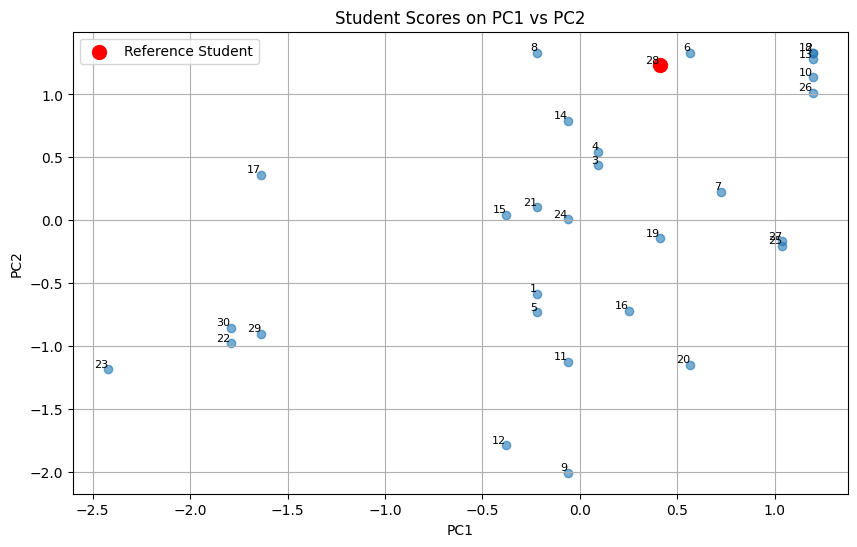

In [ ]:
# plot the student scores on PC1 vs PC2. 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_normalized_1.iloc[:, 0], df_normalized_1.iloc[:, 1], alpha=0.6)
plt.scatter(ref_student[0], ref_student[1], color='red', label='Reference Student', s=100)
for i in range(len(df_normalized_1)):
    plt.text(df_normalized_1.iloc[i, 0], df_normalized_1.iloc[i, 1], str(i+1), fontsize=8, ha='right', va='bottom')
plt.xlabel('PC1')
plt.ylabel('PC2')   
plt.title('Student Scores on PC1 vs PC2')
plt.legend()
plt.grid()
plt.show()

In [49]:
# first and last student
print("First student data:", df.iloc[0, :])
print("Middle student data:", df.iloc[14, :])
print("Last student data:", df.iloc[-1, :])
# to dataframe
df_first_last = pd.DataFrame({
    'First Student': df.iloc[0, :],
    'Middle Student': df.iloc[14, :],
    'Last Student': df.iloc[-1, :]
}).T
df_first_last

First student data: Test1            41.0
Homeworks       244.0
Quizzes         136.0
Presentation     50.0
Fianl-Exam       90.0
Name: 0, dtype: float64
Middle student data: Test1            40.0
Homeworks       295.0
Quizzes         131.0
Presentation     50.0
Fianl-Exam       44.0
Name: 14, dtype: float64
Last student data: Test1            31.0
Homeworks       222.0
Quizzes         100.0
Presentation     40.0
Fianl-Exam       24.0
Name: 29, dtype: float64


,Test1,Homeworks,Quizzes,Presentation,Fianl-Exam
First Student,41.0,244.0,136.0,50.0,90.0
Middle Student,40.0,295.0,131.0,50.0,44.0
Last Student,31.0,222.0,100.0,40.0,24.0
